In [10]:
# Importer les bibliothèques
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Charger les données
data = pd.read_csv("../data/classifieds_data.csv")


data.head()

,_id,country,city,cityDepartment,departmentCode,postalCode,lon,lat,inseeCode,cityLabel,...,pricePerSquareMeter,fees,includedFees,agencyFees,guarantee,netSellingPrice,value,feesPayingAgent,priceChanged,priceBefore
0,63247710,France,Nice (06),Nice (06),6,6100,7.261180,43.72740,6088,Nice,...,26.666667,130,True,450.00,1200,620.0,1200,acquéreur,NaN,NaN
1,60240748,France,Nice (06),Nice (06),6,6100,7.258147,43.69563,6088,Nice,...,19.479508,180,True,834.21,0,NaN,1250,NaN,7.4,1350.0
2,61816356,France,Nice (06),Nice (06),6,6000,7.248407,43.72644,6088,Nice,...,5666.957280,0,True,23400.00,0,NaN,390000,vendeur,NaN,NaN
3,62711712,France,Nice (06),Nice (06),6,6000,7.250000,43.70000,6088,Nice,...,35.135135,80,True,0.00,0,NaN,650,NaN,NaN,NaN
4,63307322,France,Nice (06),Nice (06),6,6300,7.250000,43.70000,6088,Nice,...,27.926322,50,True,218.79,0,NaN,470,NaN,NaN,NaN


In [11]:
# Info des datas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  10 non-null     int64  
 1   country              10 non-null     object 
 2   city                 10 non-null     object 
 3   cityDepartment       10 non-null     object 
 4   departmentCode       10 non-null     int64  
 5   postalCode           10 non-null     int64  
 6   lon                  10 non-null     float64
 7   lat                  10 non-null     float64
 8   inseeCode            10 non-null     int64  
 9   cityLabel            10 non-null     object 
 10  geocoded             10 non-null     bool   
 11  typeId               10 non-null     int64  
 12  id                   10 non-null     int64  
 13  department           10 non-null     object 
 14  region               10 non-null     object 
 15  pricePerSquareMeter  10 non-null     float6

In [12]:
data.describe()

,_id,departmentCode,postalCode,lon,lat,inseeCode,typeId,id,pricePerSquareMeter,fees,agencyFees,guarantee,netSellingPrice,value,priceChanged,priceBefore
count,1.000000e+01,10.0,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,9.000000,10.000000,2.000000,10.000000,1.0,1.0
mean,6.248537e+07,6.0,6050.000000,7.254186,43.704540,6088.0,6.0,3161.300000,2533.502435,69.000000,9714.344444,120.000000,68310.000000,172007.000000,7.4,1350.0
std,1.066991e+06,0.0,97.182532,0.007504,0.011980,0.0,0.0,59.063149,3070.443191,90.117208,13248.135316,379.473319,95728.116037,246889.272394,NaN,NaN
min,6.024075e+07,6.0,6000.000000,7.248407,43.694760,6088.0,6.0,3126.000000,19.479508,0.000000,0.000000,0.000000,620.000000,470.000000,7.4,1350.0
25%,6.176136e+07,6.0,6000.000000,7.250000,43.700000,6088.0,6.0,3126.000000,26.981581,0.000000,450.000000,0.000000,34465.000000,1212.500000,7.4,1350.0
50%,6.297971e+07,6.0,6000.000000,7.250000,43.700000,6088.0,6.0,3126.000000,517.567568,25.000000,834.210000,0.000000,68310.000000,28250.000000,7.4,1350.0
75%,6.333353e+07,6.0,6075.000000,7.256645,43.700877,6088.0,6.0,3199.500000,5586.527484,117.500000,22500.000000,0.000000,102155.000000,326500.000000,7.4,1350.0
max,6.339492e+07,6.0,6300.000000,7.271990,43.727400,6088.0,6.0,3283.000000,7028.423773,250.000000,34250.000000,1200.000000,136000.000000,685000.000000,7.4,1350.0


In [13]:
# Prétraitement des données
# Gestion des valeurs manquantes pour les colonnes numériques
# Supposons que 'pricePerSquareMeter' et 'value' sont les principales caractéristiques d'intérêt
data.fillna({'pricePerSquareMeter': data['pricePerSquareMeter'].median(), 'value': data['value'].median()}, inplace=True)

In [14]:
# Analyse exploratoire
# Statistiques descriptives pour les caractéristiques numériques
print(data[['pricePerSquareMeter', 'value', 'fees']].describe())

       pricePerSquareMeter          value        fees
count            10.000000      10.000000   10.000000
mean           2533.502435  172007.000000   69.000000
std            3070.443191  246889.272394   90.117208
min              19.479508     470.000000    0.000000
25%              26.981581    1212.500000    0.000000
50%             517.567568   28250.000000   25.000000
75%            5586.527484  326500.000000  117.500000
max            7028.423773  685000.000000  250.000000


In [15]:
# Sélection des caractéristiques pour le clustering
features = data[['pricePerSquareMeter', 'value']]
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajustez le nombre de clusters selon vos données

# Pipeline de prétraitement et de clustering
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(features)

# Prédire les clusters pour déterminer les groupes d'annonces
clusters = pipeline.predict(features)

# Ajouter les clusters aux données
data['cluster'] = clusters

# Analyse des clusters pour construire la requête Elasticsearch
# Calcul des moyennes pour 'pricePerSquareMeter' et 'value' par cluster
cluster_summary = data.groupby('cluster')[['pricePerSquareMeter', 'value']].mean()

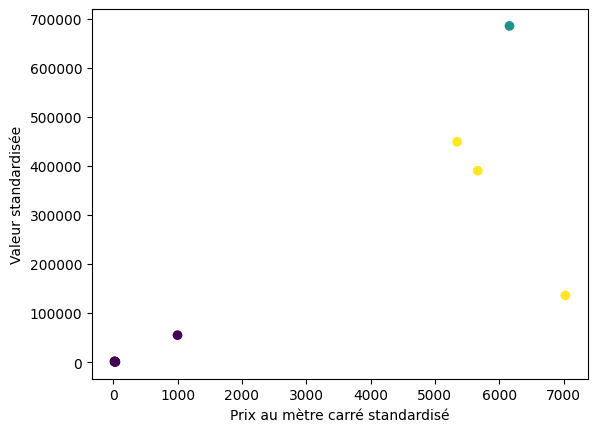

In [16]:
plt.scatter(data['pricePerSquareMeter'], data['value'], c=data['cluster'], cmap='viridis')
plt.xlabel('Prix au mètre carré standardisé')
plt.ylabel('Valeur standardisée')
plt.show()

**Explication**:

- Le scatter plot montre la distribution des annonces immobilières sur les deux features standardisées.
- Les points sont colorés selon le cluster auquel ils appartiennent.
- Cela permet de visualiser les différences entre les clusters et d'identifier les tendances.

In [17]:
cluster_summary

,pricePerSquareMeter,value
cluster,,
0,189.055543,10011.666667
1,6160.071942,685000.000000
2,6013.539716,325000.000000


In [18]:
# Créer une fonction pour générer des requêtes Elasticsearch basées sur les clusters
def generate_es_query(cluster_summary, cluster_id):
    cluster = cluster_summary.loc[cluster_id]
    query = {
      "query": {
        "bool": {
          "filter": [
            {"range": {"value": {"gte": cluster['value'] * 0.8, "lte": cluster['value'] * 1.2}}},
            {"range": {"pricePerSquareMeter": {"gte": cluster['pricePerSquareMeter'] * 0.8, "lte": cluster['pricePerSquareMeter'] * 1.2}}}
          ]
        }
      }
    }
    return query

# Exemple d'utilisation : Générer une requête pour le premier cluster
example_query = generate_es_query(cluster_summary, 0)
print(example_query)

{'query': {'bool': {'filter': [{'range': {'value': {'gte': 8009.333333333333, 'lte': 12013.999999999998}}}, {'range': {'pricePerSquareMeter': {'gte': 151.24443460593645, 'lte': 226.8666519089047}}}]}}}
